# Example Notebook for loading and analysing data from the 2D-morphologies dataset

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import aira_data_utils
from aira_data_utils.aira_data_utils import AIRADataset
from aira_data_utils.analysis import get_p1_value, get_p2_vector, get_dataset_p1_distribution, get_segmented_ds

In [3]:
# dataset = AIRADataset('./data.h5', img_size=64, dataset_type='tiny', download=True)
dataset = AIRADataset('./data.h5', img_size=64, dataset_type='tiny')

In [4]:
sample_imgs = dataset.generate_thumbnails()

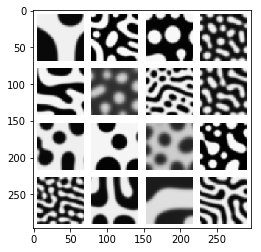

In [5]:
plt.imshow(sample_imgs, cmap='gray')

## Calculation of P1 value for a sample

In [6]:
example_img = dataset[0]

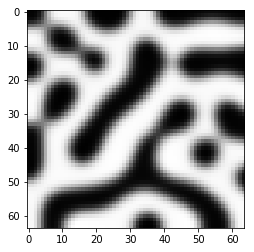

In [7]:
plt.imshow(example_img, cmap='gray')

In [8]:
print('P1 value of image: {}'.format(get_p1_value(example_img)))

P1 value of image: 0.5577938556671143


## Calculation of P2 correlation vector for a sample

In [9]:
p2_vec = get_p2_vector(example_img)

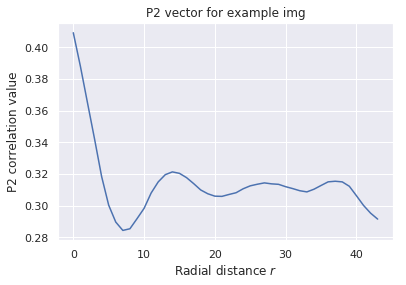

In [10]:
sns.set()
plt.figure()
plt.title('P2 vector for example img')
plt.xlabel('Radial distance $r$')
plt.ylabel('P2 correlation value')
plt.plot(p2_vec)

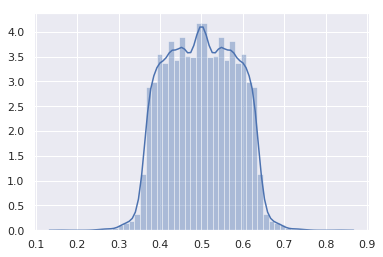

In [11]:
#plt.hist([get_p1_value(i) for i in dataset], bins=20)
fig = plt.figure()
ax = get_dataset_p1_distribution(dataset, bins=20)
fig.add_axes(ax)
plt.show()

## Iterating over the dataset

The dataset class supports iterations and slicing similar to that of Numpy Arrays

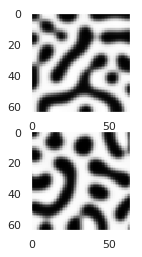

In [12]:
sns.set_style({"axes.grid":False})
ds = dataset[0:2]
plt.subplot(211)
plt.imshow(ds[0], cmap='gray')
plt.subplot(212)
plt.imshow(ds[1], cmap='gray')

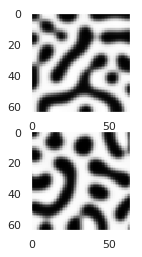

In [13]:
for idx, i in enumerate(dataset):
    plt.subplot(210+idx+1)
    plt.imshow(i, cmap='gray')
    if idx == 1:
        break

## Segmented Dataset

The dataset can be segmented over p1 values as well.

In [14]:
ds = get_segmented_ds(dataset[0:30], p1_range=(0.45, 0.5))

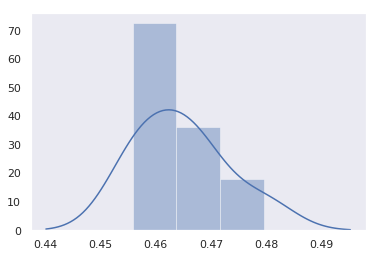

In [15]:
ax = get_dataset_p1_distribution(ds, bins=100)